Generates plots of melt freeze anomalies for Arctic sea ice

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os, glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/apbarret/builds/anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [4]:
diri = '/disks/sidads_ftp/pub/incoming/julienne'
frzAnom2016 = np.fromfile(os.path.join(diri,'anom_freeze.2016_EASE'),dtype='float32').reshape(361,361)
mltAnom2016 = np.fromfile(os.path.join(diri,'anom_melt.2016_EASE'),dtype='float32').reshape(361,361)

frzAnom2017 = np.fromfile(os.path.join(diri,'anom_freeze.2017_EASE'),dtype='float32').reshape(361,361)
mltAnom2017 = np.fromfile(os.path.join(diri,'anom_melt.2017_EASE'),dtype='float32').reshape(361,361)


In [9]:
frzAnom2016 = np.where((frzAnom2016 == 0.) | (frzAnom2016 >= 400.), np.nan, frzAnom2016)
frzAnom2017 = np.where((frzAnom2017 == 0.) | (frzAnom2017 >= 400.), np.nan, frzAnom2017)
mltAnom2016 = np.where((mltAnom2016 == 0.) | (mltAnom2016 >= 400.), np.nan, mltAnom2016)
mltAnom2017 = np.where((mltAnom2017 == 0.) | (mltAnom2017 >= 400.), np.nan, mltAnom2017)

print (np.nanmin(frzAnom2016), np.nanmax(frzAnom2016))
print (np.nanmin(mltAnom2016), np.nanmax(mltAnom2016))

print (np.nanmin(frzAnom2017), np.nanmax(frzAnom2017))
print (np.nanmin(mltAnom2017), np.nanmax(mltAnom2017))

(-165.40039, 161.60742)
(-101.2666, 87.933594)
(-400.0, 160.13281)
(-211.0, 101.75)


/home/apbarret/builds/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


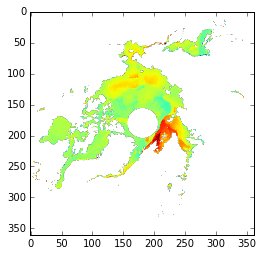

In [8]:
plt.imshow(frzAnom2016)

## Get Coordinates

In [11]:
gdiri = '/oldhome/apbarret/projects/ancillary/maps'
lon = np.fromfile(os.path.join(gdiri,'xcenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)
lat = np.fromfile(os.path.join(gdiri,'ycenter.Na25.361x361x1.float'), dtype='float32').reshape(361,361)

In [12]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

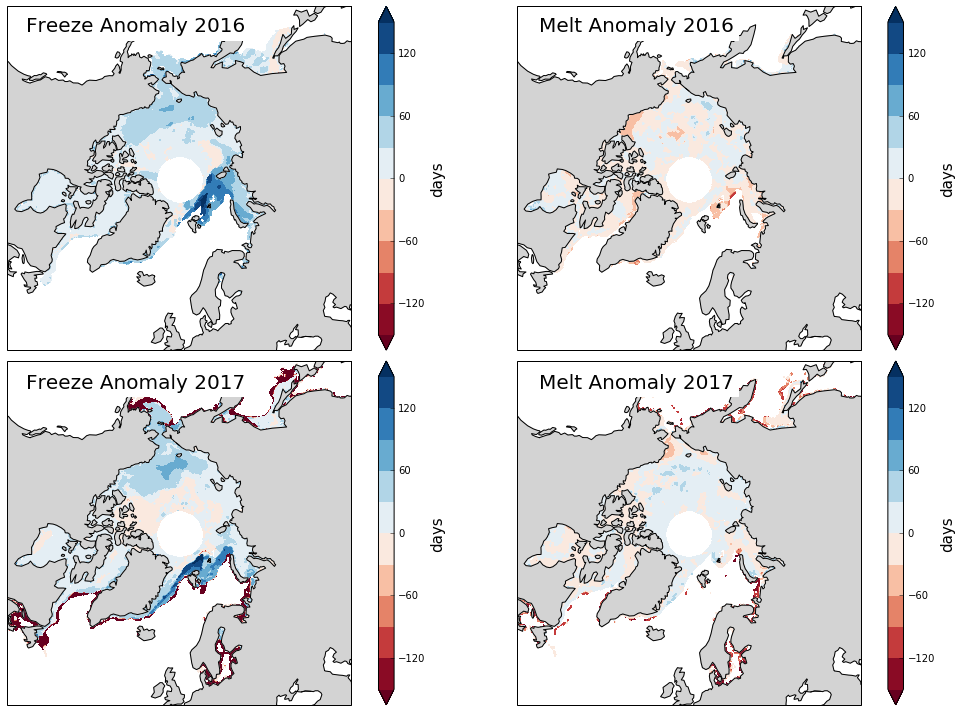

In [15]:
map_proj = ccrs.NorthPolarStereo()

coords = map_proj.transform_points(ccrs.PlateCarree(), lon, lat)

trndLevels = np.linspace(-150.,150.,11) #np.array([-50.,-40.,-30.,-20.,-10.,10.,20.,30.,40.,50.]) #np.linspace(-2.5,2.5,11)
cmap = 'RdBu'

fig = plt.figure(figsize=(15,10))
#fig.subplots_adjust(bottom=0.1)
#cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.8])

ax1 = plt.subplot(2,2,1,projection=map_proj)
ax1.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs1 = ax1.contourf(coords[:,:,0], coords[:,:,1], frzAnom2016, levels=trndLevels, extend='both', cmap=cmap)
ax1.add_feature(cfeature.LAND, facecolor='lightgrey')
ax1.coastlines()
cbar1 = plt.colorbar(cs1, ax=ax1)
cbar1.set_label('days', fontsize=15)
plt.figtext(0.11, 0.95, 'Freeze Anomaly 2016', fontsize=20, backgroundcolor='w')

ax2 = plt.subplot(2,2,2,projection=map_proj)
ax2.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs2 = ax2.contourf(coords[:,:,0], coords[:,:,1], mltAnom2016, levels=trndLevels, extend='both', cmap=cmap)
cbar2 = plt.colorbar(cs2, ax=ax2)
cbar2.ax.set_ylabel('days', fontsize=15)
ax2.add_feature(cfeature.LAND, facecolor='lightgrey')
ax2.coastlines()
plt.figtext(0.585, 0.95, 'Melt Anomaly 2016', fontsize=20, backgroundcolor='w')

ax3 = plt.subplot(2,2,3,projection=map_proj)
ax3.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs3 = ax3.contourf(coords[:,:,0], coords[:,:,1], frzAnom2017, levels=trndLevels, extend='both', cmap=cmap)
ax3.add_feature(cfeature.LAND, facecolor='lightgrey')
ax3.coastlines()
cbar3 = plt.colorbar(cs3, ax=ax3)
cbar3.set_label('days', fontsize=15)
plt.figtext(0.11, 0.455, 'Freeze Anomaly 2017', fontsize=20, backgroundcolor='w')

ax4 = plt.subplot(2,2,4,projection=map_proj)
ax4.set_extent([-180.,180.,50.,90.], ccrs.PlateCarree())
cs4 = ax4.contourf(coords[:,:,0], coords[:,:,1], mltAnom2017, levels=trndLevels, extend='both', cmap=cmap)
cbar4 = plt.colorbar(cs4, ax=ax4)
cbar4.ax.set_ylabel('days', fontsize=15)
ax4.add_feature(cfeature.LAND, facecolor='lightgrey')
ax4.coastlines()
plt.figtext(0.585, 0.455, 'Melt Anomaly 2017', fontsize=20, backgroundcolor='w')

plt.tight_layout()

plt.savefig('freeze_melt_anomaly.png')